## prediction of Apple Quality

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [4]:
data = pd.read_csv('apple_quality.csv')

In [5]:
data.dropna(inplace=True)

In [6]:
X = data.drop(columns=['Quality'])
y = data['Quality']

In [7]:
data.shape

(4000, 9)

In [8]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [10]:
data.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality           2
dtype: int64

In [11]:
data.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.500000,1154.844867,0.000000,999.750000,1999.500000,2999.250000,3999.000000
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837


## Corelation Of Feature

<Axes: >

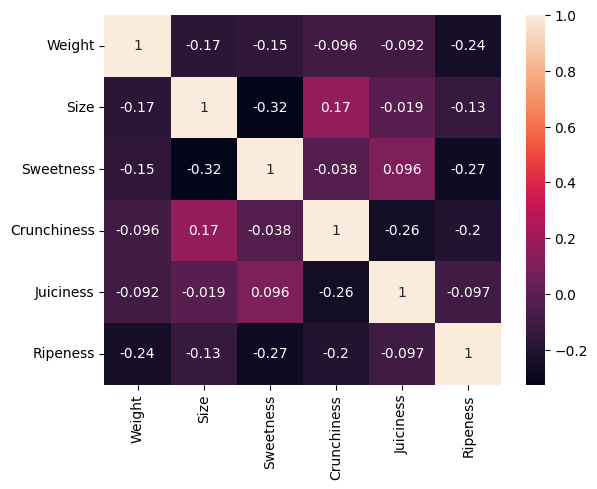

In [13]:
import seaborn as sns
sns.heatmap(data[['Weight','Size','Sweetness','Crunchiness','Juiciness','Ripeness']].corr(),annot=True)

array([[<Axes: title={'center': 'A_id'}>,
        <Axes: title={'center': 'Size'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Sweetness'}>,
        <Axes: title={'center': 'Crunchiness'}>,
        <Axes: title={'center': 'Juiciness'}>],
       [<Axes: title={'center': 'Ripeness'}>, <Axes: >, <Axes: >]],
      dtype=object)

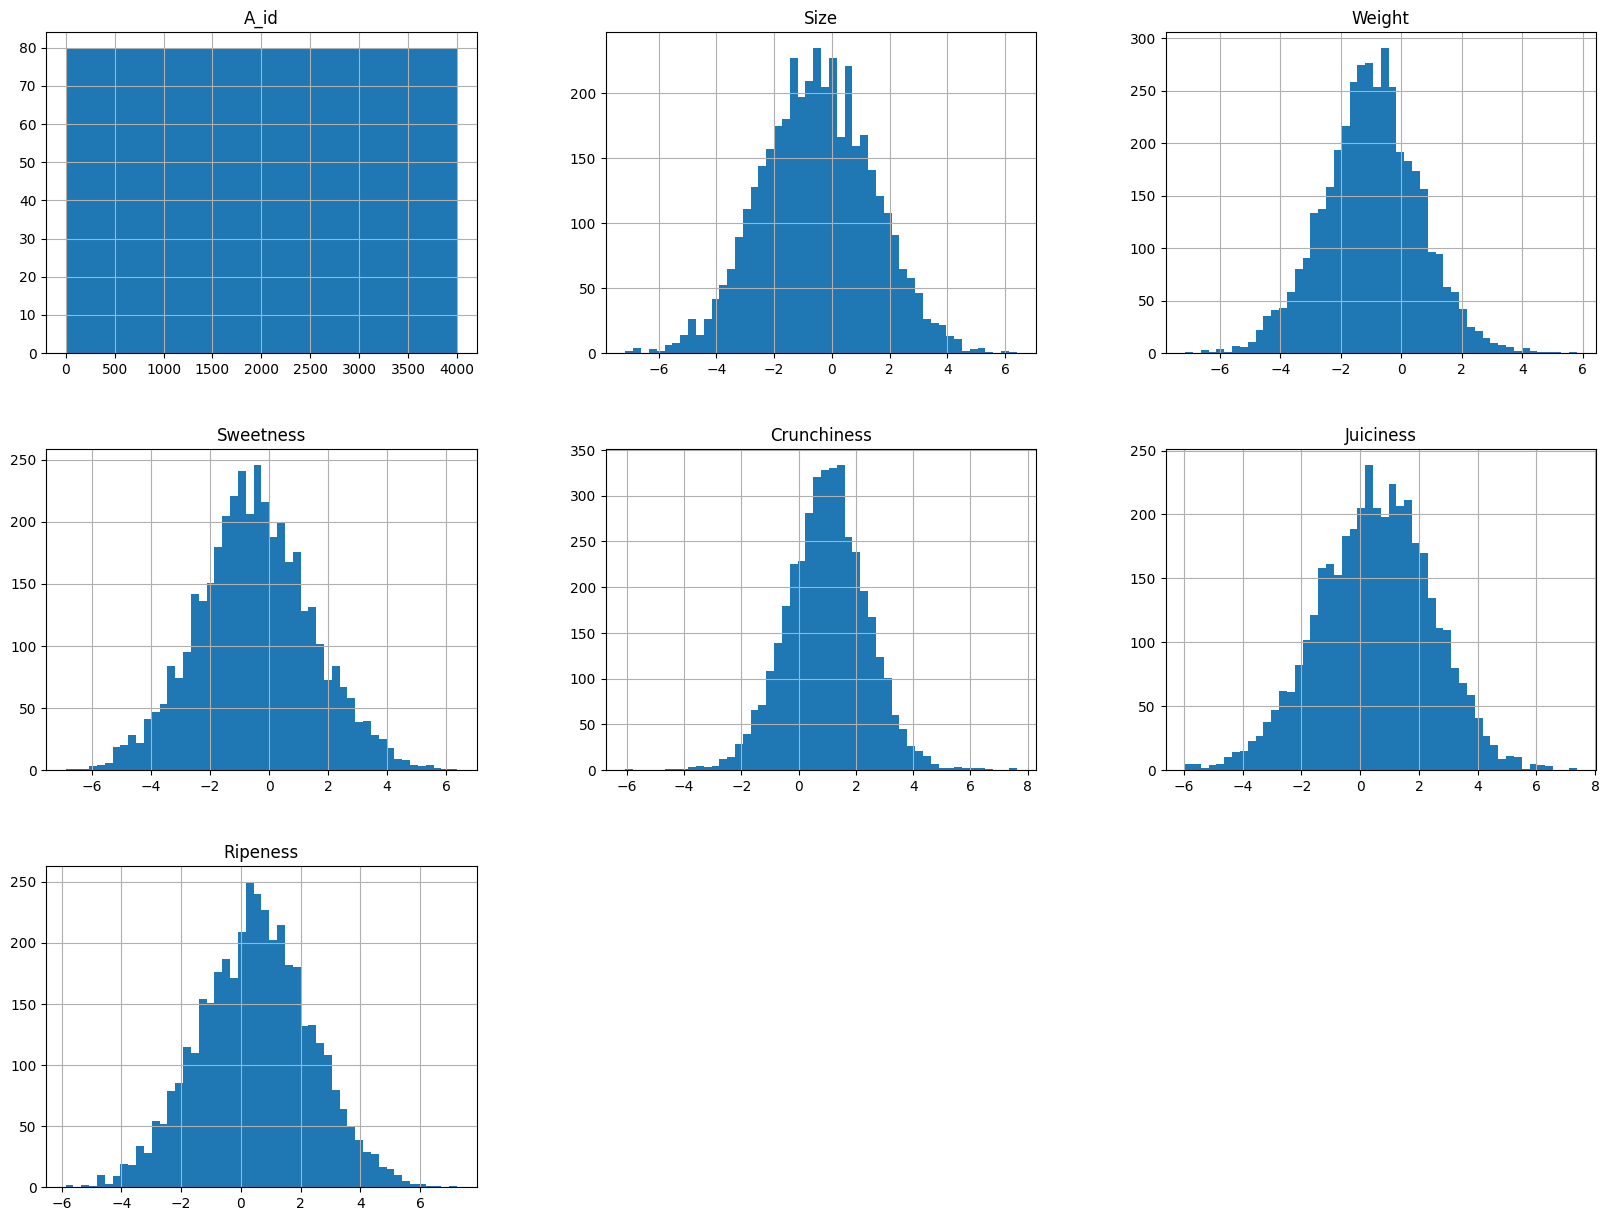

In [14]:
data.hist(bins=50, figsize=(20,15))

In [15]:
Q1,Q3 = data['Weight'].quantile([.25,.75])
IQR = Q3-Q1
ll=Q1-1.5*(IQR)
UL=Q3+1.5*(IQR)

In [16]:
UL

3.0950965391249996

In [17]:
weight = data.drop(['Size','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity','Quality'],axis='columns')
weight.head()

,A_id,Weight
0,0.0,-2.512336
1,1.0,-2.839257
2,2.0,-1.351282
3,3.0,-2.271627
4,4.0,-1.296612


In [18]:
weeight=weight[weight['Weight']>UL]
weeight.head()

,A_id,Weight
247,247.0,5.149000
257,257.0,3.603286
276,276.0,4.738227
484,484.0,3.285301
672,672.0,4.363066


In [19]:
categorical_columns = ['Size','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

## Split the data in Training Testing data

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3200, 8), (800, 8), (3200,), (800,))

In [22]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [23]:
for clf_name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Classifier: Logistic Regression
Accuracy: 0.74375
Classification Report:
              precision    recall  f1-score   support

         bad       0.74      0.76      0.75       401
        good       0.75      0.73      0.74       399

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

Classifier: Random Forest
Accuracy: 0.8975
Classification Report:
              precision    recall  f1-score   support

         bad       0.90      0.89      0.90       401
        good       0.89      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Classifier: Decision Tree
Accuracy: 0.8325
Classification Report:
              precision    recall  f1-score   support

         bad       0.83      0.83      0.83       401
        good       0.83      0.8

## Hyperparameter tuning for Random Forest

In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
rf_clf = RandomForestClassifier()

In [27]:
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [28]:
print("Best Parameters for Random Forest:")
print(rf_grid_search.best_params_)

Best Parameters for Random Forest:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [29]:
for clf_name, clf in classifiers.items():
    if clf_name == "Random Forest":
        clf = RandomForestClassifier(**rf_grid_search.best_params_)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

Classifier: Logistic Regression
Accuracy: 0.74375
Classification Report:
              precision    recall  f1-score   support

         bad       0.74      0.76      0.75       401
        good       0.75      0.73      0.74       399

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

Classifier: Random Forest
Accuracy: 0.8975
Classification Report:
              precision    recall  f1-score   support

         bad       0.90      0.90      0.90       401
        good       0.90      0.89      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Classifier: Decision Tree
Accuracy: 0.825
Classification Report:
              precision    recall  f1-score   support

         bad       0.83      0.82      0.82       401
        good       0.82      0.83

In [30]:
# Assuming 'quality' is a categorical variable
encoded_data = pd.get_dummies(data, columns=['Quality'])
correlation_matrix = encoded_data.corr()

# correlation_matrix = data.corr()

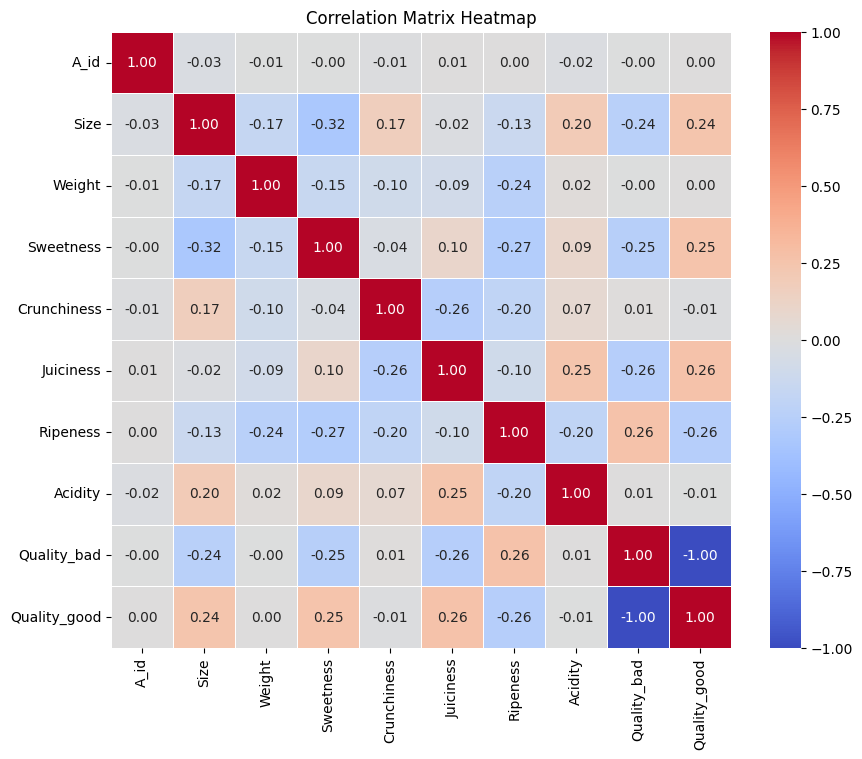

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

Classifier: Logistic Regression
Accuracy: 0.74375
Classification Report:
              precision    recall  f1-score   support

         bad       0.74      0.76      0.75       401
        good       0.75      0.73      0.74       399

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800

Classifier: Random Forest
Accuracy: 0.895
Classification Report:
              precision    recall  f1-score   support

         bad       0.90      0.90      0.90       401
        good       0.89      0.89      0.89       399

    accuracy                           0.90       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.90      0.90      0.90       800

Classifier: Decision Tree
Accuracy: 0.82625
Classification Report:
              precision    recall  f1-score   support

         bad       0.83      0.83      0.83       401
        good       0.82      0.8

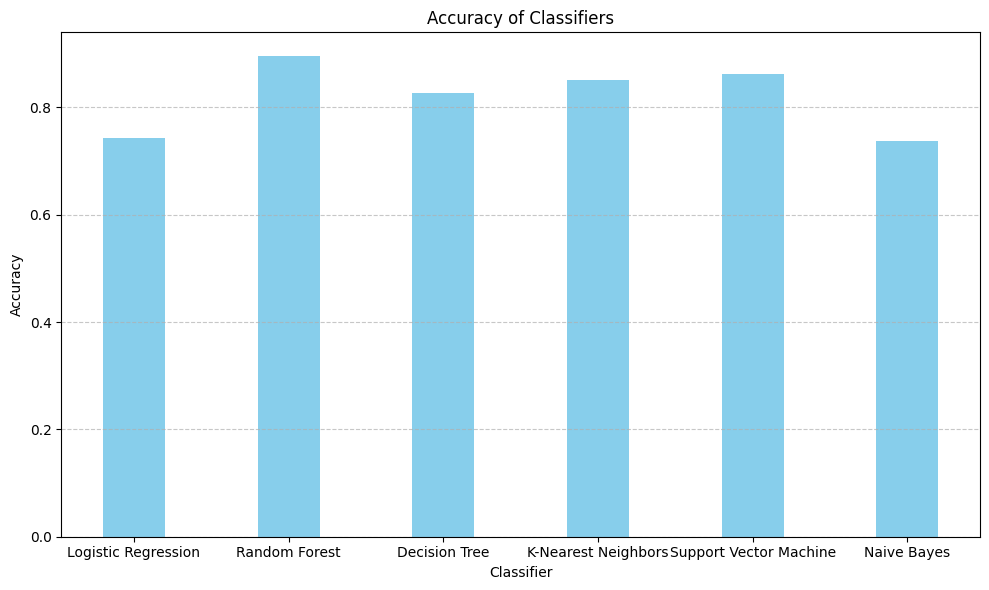

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Example dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

accuracy_results = {}  # Dictionary to store accuracy for each classifier

for clf_name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[clf_name] = accuracy  # Store accuracy for this classifier
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")
    print("="*50)

plt.figure(figsize=(10, 6))
plt.bar(list(accuracy_results.keys()), list(accuracy_results.values()), color='skyblue', width=0.4)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy of Classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
